In [2]:
from PIL import Image

mosaic_size = (40,40)
target_size = (20,20)

with Image.open('images/1.jpeg') as im:
    im = im.resize((mosaic_size[0]*target_size[0], mosaic_size[1]*mosaic_size[1]), Image.LANCZOS)
    im.show()

In [ ]:
def divide_images(img_path, divisions):
    img = Image.open(img_path)
    grid_size 

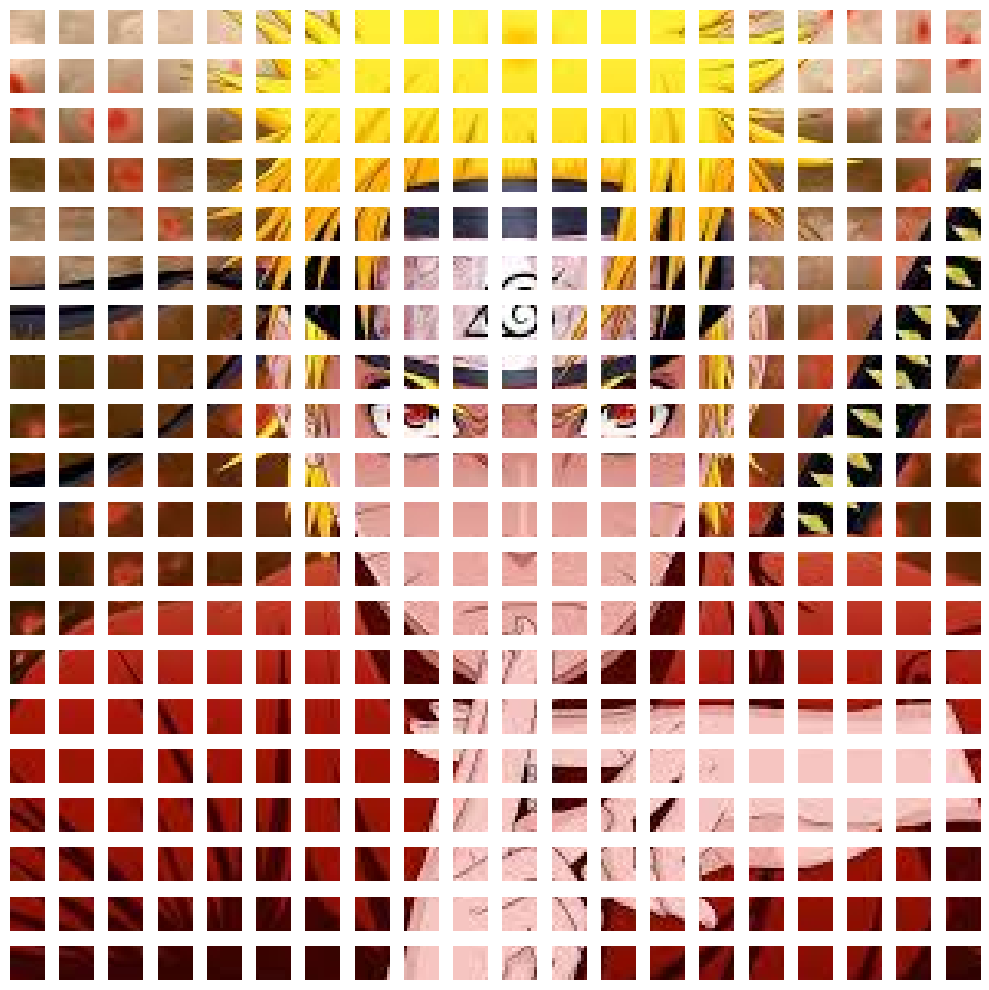

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "images/1.jpeg"
image = Image.open(image_path)
divisions 

grid_size = (image.width // 20, image.height // 20)

# Initialize the plot for visualizing each grid cell
fig, axs = plt.subplots(20, 20, figsize=(10, 10))

# Iterate through each grid cell and display it
for i in range(20):
    for j in range(20):
        # Calculate the coordinates for the current grid cell
        x1, y1 = j * grid_size[0], i * grid_size[1]
        x2, y2 = (j + 1) * grid_size[0], (i + 1) * grid_size[1]

        # Extract the image data for the current grid cell
        grid_image = image.crop((x1, y1, x2, y2))

        # Display the grid cell on the plot
        axs[i, j].imshow(grid_image)
        axs[i, j].axis("off")  # Turn off axis labels for clarity

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


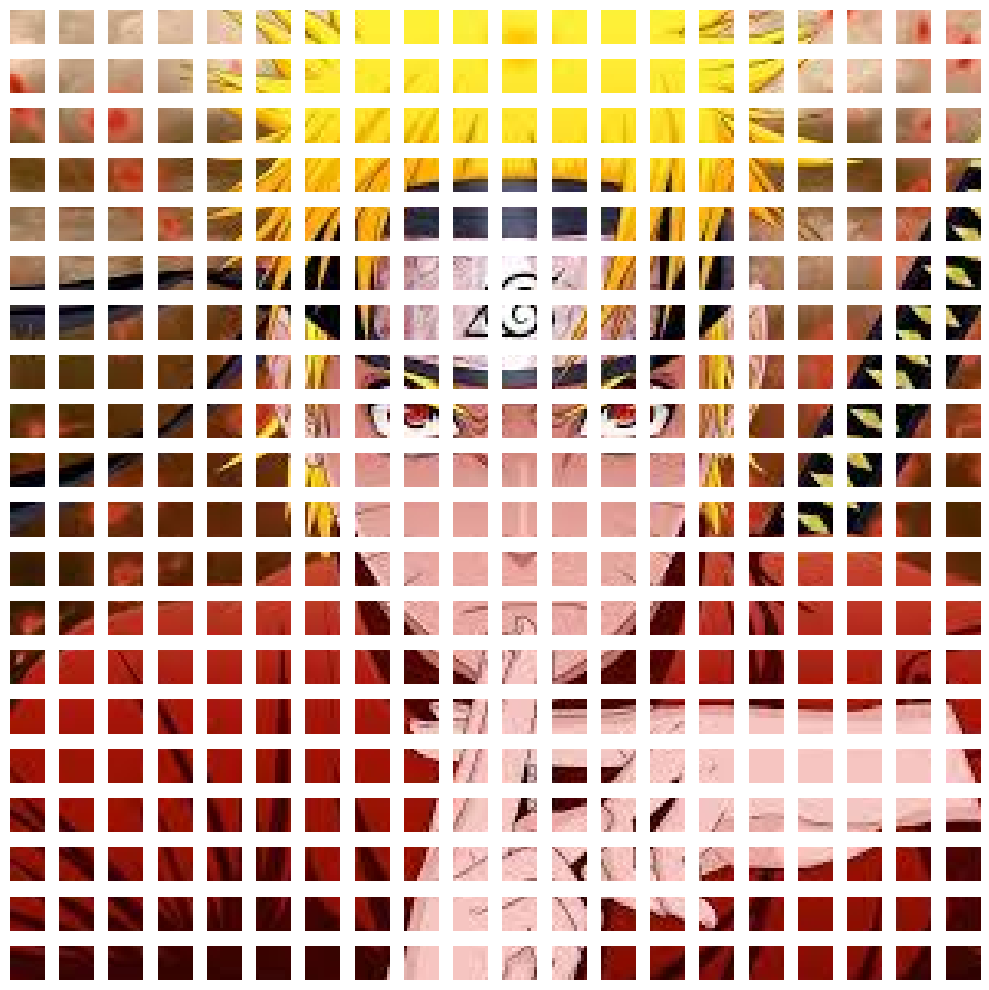

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "images/1.jpeg"
image = Image.open(image_path)

# Convert the image to a NumPy array for faster processing
image_array = np.array(image)

# Define the size of each grid cell
grid_size = (image_array.shape[0] // 20, image_array.shape[1] // 20)

# Initialize the plot for visualizing each grid cell
fig, axs = plt.subplots(20, 20, figsize=(10, 10))

# Iterate through each grid cell and display it
for i in range(20):
    for j in range(20):
        # Calculate the coordinates for the current grid cell
        x1, y1 = j * grid_size[1], i * grid_size[0]
        x2, y2 = (j + 1) * grid_size[1], (i + 1) * grid_size[0]

        # Extract the image data for the current grid cell
        grid_image = image_array[y1:y2, x1:x2, :]

        # Display the grid cell on the plot
        axs[i, j].imshow(grid_image)
        axs[i, j].axis("off")  # Turn off axis labels for clarity

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


def load_divide_image(img_path, divisions):
    results = []

    image = Image.open(img_path)
    image_array = np.array(image)
    grid_size = (image_array.shape[0]//divisions, image_array.shape[1]//divisions)
    
    for i in range(divisions):
        for j in range(divisions):
            x1, y1 = j * grid_size[1], i * grid_size[0]
            x2, y2 = (j + 1) * grid_size[1], (i + 1) * grid_size[0]
            
            grid_image = image_array[y1:y2, x1:x2, :]
            data = {'image': grid_image, 'x1':x1, 'y1':y1, 'y2': y2, 'x2':x2}
            results.append(data)
    
    return results



In [44]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def resize_image(img : Image, size : tuple) -> np.ndarray:
        resz_img = ImageOps.fit(img, size, Image.LANCZOS, centering=(0.5, 0.5))
        return np.array(resz_img)

def load_divide_image(img_path, divisions,scale=1):
    results = []

    image = Image.open(img_path)
    original_width, original_height = image.size
    print('image size', image.size)
    image = resize_image(image, (original_width *scale, original_height*scale))
    print('new image size', image.shape)
    image_array = np.array(image)
    grid_size = (image_array.shape[0]//divisions, image_array.shape[1]//divisions)
    
    for i in range(divisions):
        for j in range(divisions):
            x1, y1 = j * grid_size[1], i * grid_size[0]
            x2, y2 = (j + 1) * grid_size[1], (i + 1) * grid_size[0]
            
            grid_image = image_array[y1:y2, x1:x2, :]
            data = {'image': grid_image, 'x1':x1, 'y1':y1, 'y2': y2, 'x2':x2, 'i':i, 'j':j}
            results.append(data)
    
    return results, grid_size, image.shape

In [45]:
results,grid_size, target_shape = load_divide_image('images/1.jpeg', 20,2)

image size (226, 223)
new image size (446, 452, 3)


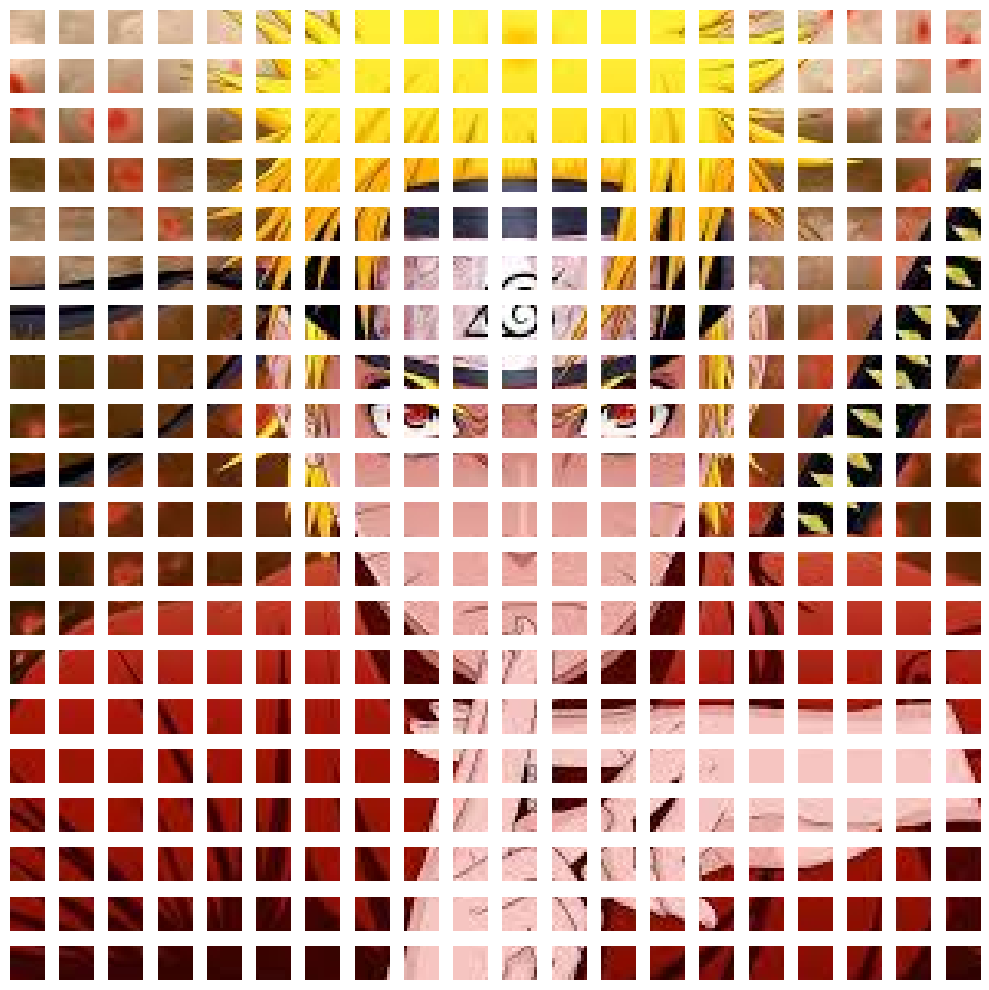

In [36]:
fig, axs = plt.subplots(20, 20, figsize=(10, 10))

for result in results:
    axs[result['i'], result['j']].imshow(result['image'])
    axs[result['i'], result['j']].axis("off") 

plt.tight_layout()
plt.show()     

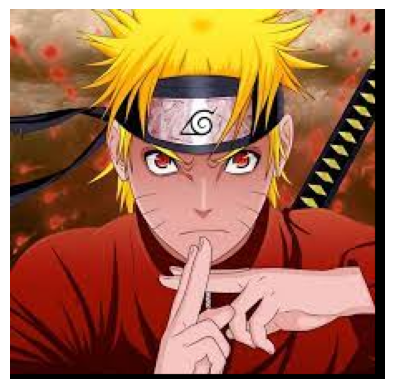

In [17]:
#cmbine images
img = Image.open('images/1.jpeg')
img_array = np.array(img)
combined_image = np.zeros_like(img_array)

for result in results:
    combined_image[result['y1']:result['y2'], result['x1']:result['x2'], :] = result['image']

combined_image_pil = Image.fromarray(combined_image)

# Display the combined image
plt.imshow(combined_image_pil)
plt.axis('off')  # Turn off axis labels for clarity
plt.show()

In [31]:
grid_size

(11, 11)

In [37]:
from scipy import spatial
import random

def load_tile_images(image_path):
    images = []
    for path in image_path:
         with Image.open(path) as im:
            im_arr = np.asarray(im)
            images.append(im_arr)
    return images

def match_tiles(tile_images_path, results, grid_size):
    tile_images = load_tile_images(tile_images_path)
    print(len(tile_images))
    tile_images = [i for i in tile_images if i.ndim==3]
    tile_images = [resize_image(Image.fromarray(i), grid_size) for i in tile_images]
    tile_images_array = np.asarray(tile_images)
    tile_images_values = np.apply_over_axes(np.mean, tile_images_array, [1,2]).reshape(len(tile_images),3)

    print(f"Tile Image process completed: {len(tile_images)} tile images")

    tree = spatial.KDTree(tile_images_values)

    for result in results:
        grid_image = result['image']
        match = tree.query(grid_image, k=3)
        pick = random.randint(0, 3)
        result['pick'] = match[1][pick]
    
    return results

def blend_and_combine(target_shape, results, tile_images):
    
    


